In [1]:
import os
import sys
import logging
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import json

import fcLib
import fcSelector
from fcSelector import ForecasterFramework
from fcWrapper import ForecasterWrapper

In [2]:
# create a list of forecaster candidate to evalute
fcList = fcLib.forecaster_list

# selecting 4 arbitrary forecaster options
fcListUser = json.dumps(fcList)
# fcListUser = [fcList[ii] for ii in [2,8,9,11]]

### Case 5. Initialize empty  data. Add values (Combine SCADA & Weather sources)

In [3]:
# function for generating example scada observation
# def example_scada():
#     data = {'soc': 0.5, 'pmax': 1e3, 'emax': 5e3, 
#             'echa': 0.96, 'edis': 0.96, 'smin': 0.1, 'smax': 1.0}
#     scada1 = pd.DataFrame(index=range(len(data)*3), columns=['name', 'value', 'valid', 'error'])
#     ix = 0
#     for par, v in data.items():
#         for i in range(3):
#             scada1.loc[ix, :] = [f'irn{i}_battery-{par}', v, 1, '']
#             ix += 1
#     return scada1.to_json()

def example_scada_random():
    # generates a list of SCADA readings with randome SOCs           
    data = {'soc': 99, 'pmax': 1e3, 'emax': 5e3, 
            'echa': 0.96, 'edis': 0.96, 'smin': 0.1, 'smax': 1.0}
    
    scada1 = pd.DataFrame(index=[0], columns=['name', 'value', 'valid', 'error'])
    ix = 0
#     for par, v in data.items():
#         for i in range(3):
            
#             # overwrite static SOC with random value
#             if par == 'soc':
#                 v = round(random.uniform(0.25, 0.9), 2)
            
#             scada1.loc[ix, :] = [f'irn{i}_battery-{par}', v, 1, '']
#             ix += 1
    # add pv target
    scada1.loc[ix, :] = [f'irn0_power-pv', round(random.uniform(0.25, 0.9), 2), 1, '']
    ix += 1
    # add weather
    for c in ['weather-dhi','weather-gni','weather-ghi','weather-rhu',
              'weather-oat','weather-wdi','weather-wsp']:
        scada1.loc[ix, :] = [c, 0, 1, '']
        ix += 1
            
    return scada1.to_json()

def example_weather_forecast_random():
    
    weatherFilePath = os.path.abspath(os.path.join(os.getcwd(), 
                'example_weatherforecast.csv'))

    newWeatherRecord = pd.read_csv(weatherFilePath, index_col=0)
    
    # generate random value to scale forecast by
    scaleVal = random.uniform(0.95, 1.05)
    
    newWeatherRecord[newWeatherRecord.select_dtypes(include=['number']).columns] *= scaleVal

    return newWeatherRecord.to_json()

# newScadaRecord = example_scada()

# read example weather forecast from external file
# includes multiple hours of forecasted data to be unstacked for each observation timestamp
weatherFilePath = os.path.abspath(os.path.join(os.getcwd(), 
                'example_weatherforecast.csv'))

newWeatherRecord = pd.read_csv(weatherFilePath, index_col=0)



# create initial inputs with no training data
# target column name currently required
# newInputs = {
#     'forecaster-list': fcListUser, 
#     'training-data': {
#         'targetName': 'irn0_battery-edis',
#         'unpackHourly': True
#     }
# }

# instantiate forecast framework wrapper
n1 = ForecasterWrapper()

# update inputs and run compute 
# compute method will return error msg saying no training data 
# n1.input = newInputs
# n1.compute()

# create logger
logging.getLogger().setLevel(logging.WARNING)

# iterate through each new record to add 1 by 1
for rr in range(0, 24*3):

    # create generic hypothetical timestamp
    dataTs = pd.to_datetime('2018-08-21 00:00:00') + pd.DateOffset(hours=rr)
    
    print(dataTs)
    
    newInput2 = {
        'forecaster-list': fcListUser, 
        
        'data-timestamp':  dataTs,
        'scada-data': example_scada_random(),
        'weather-data': example_weather_forecast_random(),
        
        'training-data': {
            'inputPath': './backup_C.csv',
            'targetName': 'irn0_power-pv',
            'unpackHourly': False,
            'fcParams': {'minDays': 1,
                         'trainMethod': 'train_test_split', #'daily_split'
                         'horizon': 24, # horizon of forecast data (all weather data is used; can be less than that)
                         'stepsize': 60*60, # stepsize of forecast in seconds
                         'add_features': True}
        }
    }


    n1.input = newInput2

    # run compute method to train and predict
    n1.compute()
    
    print(n1.msg)
    
print('Stored Training Data X:')
print(n1.trainingData['X'])

print('\nStored Training Data y:')
print(n1.trainingData['y'])

2018-08-21 00:00:00

2018-08-21 01:00:00

2018-08-21 02:00:00

2018-08-21 03:00:00

2018-08-21 04:00:00

2018-08-21 05:00:00

2018-08-21 06:00:00

2018-08-21 07:00:00

2018-08-21 08:00:00

2018-08-21 09:00:00

2018-08-21 10:00:00

2018-08-21 11:00:00

2018-08-21 12:00:00

2018-08-21 13:00:00

2018-08-21 14:00:00

2018-08-21 15:00:00

2018-08-21 16:00:00

2018-08-21 17:00:00

2018-08-21 18:00:00

2018-08-21 19:00:00

2018-08-21 20:00:00

2018-08-21 21:00:00

2018-08-21 22:00:00

2018-08-21 23:00:00

2018-08-22 00:00:00
Done.
2018-08-22 01:00:00
Done.
2018-08-22 02:00:00
Done.
2018-08-22 03:00:00
Done.
2018-08-22 04:00:00
Done.
2018-08-22 05:00:00
Done.
2018-08-22 06:00:00
Done.
2018-08-22 07:00:00
Done.
2018-08-22 08:00:00
Done.
2018-08-22 09:00:00
Done.
2018-08-22 10:00:00
Done.
2018-08-22 11:00:00
Done.
2018-08-22 12:00:00
Done.
2018-08-22 13:00:00
Done.
2018-08-22 14:00:00
Done.
2018-08-22 15:00:00
Done.
2018-08-22 16:00:00
Done.
2018-08-22 17:00:00
Done.
2018-08-22 18:00:00
Done.
20

In [4]:
print(n1.msg)

Done.


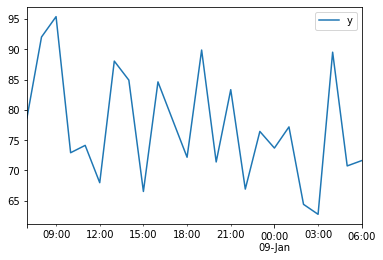

In [5]:
pd.read_json(n1.output['output-data']).plot()
plt.show()